In load mode data is not shuffled by default
Dataset length: 1000
Train size: 0
Validation size: 1000


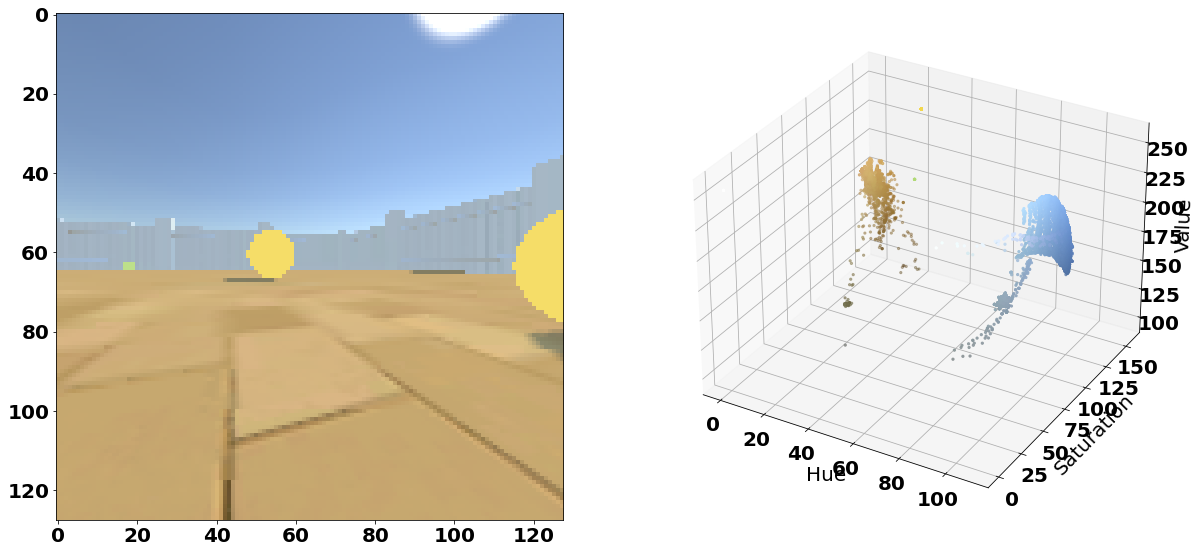

In [141]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import colors
import os
import sys
import skimage.feature as feature
import torch
import torch.nn.functional as F
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

# Project imports
from slot_attention_and_alignnet.src.dataloaders import DataController, DataLoader



plt.rcParams['figure.figsize'] = (20, 20)

# Read image and convert to RGB
# img = cv2.imread('my_figure.png')
# img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

d2 = DataController('/media/home/thomas/data', batch_size=1, test_train_split=0, file_name='goals_closer_test', load_mode=True, shuffle=False, unbatch=False)
val_ds = DataLoader(d2, 1, split="validation")
a = list(val_ds)
img = np.array(a[993]).squeeze()

# Get pixel colors from image
pixel_colors = img.reshape((np.shape(img)[0]*np.shape(img)[1], 3))
norm = colors.Normalize(vmin=-1.,vmax=1.)
norm.autoscale(pixel_colors)
pixel_colors = norm(pixel_colors).tolist()

# Convert image to HSV, split H/S/V
hsv_img = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)
h, s, v = cv2.split(hsv_img)
flat_h, flat_s, flat_v = h.flatten(), s.flatten(), v.flatten()

fig = plt.figure()
ax1 = fig.add_subplot(1, 2, 1)
ax1.imshow(img)

ax2 = fig.add_subplot(1, 2, 2, projection="3d")
ax2.scatter(flat_h, flat_s, flat_v, facecolors=pixel_colors, marker=".")
ax2.set_xlabel("Hue")
ax2.set_ylabel("Saturation")
ax2.set_zlabel("Value")
plt.show()


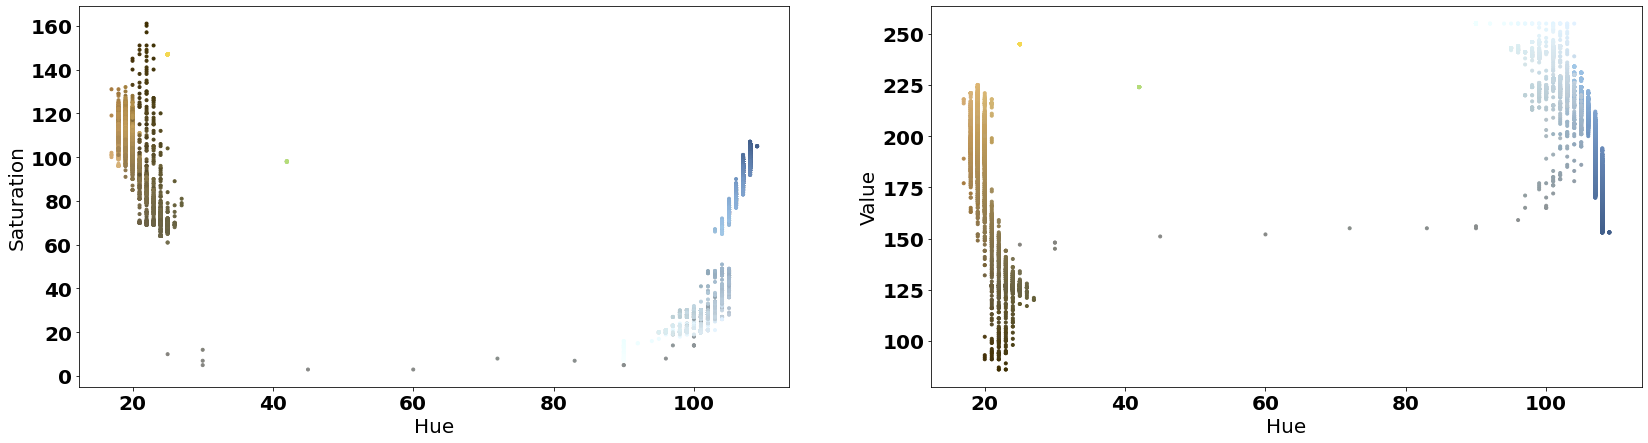

In [116]:
# Plot H-S and H-V for easy value reading for color ranges

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(28, 7))

ax1.scatter(flat_h, flat_s, facecolors=pixel_colors, marker=".")
ax1.set_xlabel("Hue")
ax1.set_ylabel("Saturation")

ax2.scatter(flat_h, flat_v, facecolors=pixel_colors, marker=".")
ax2.set_xlabel("Hue")
ax2.set_ylabel("Value")
plt.show()

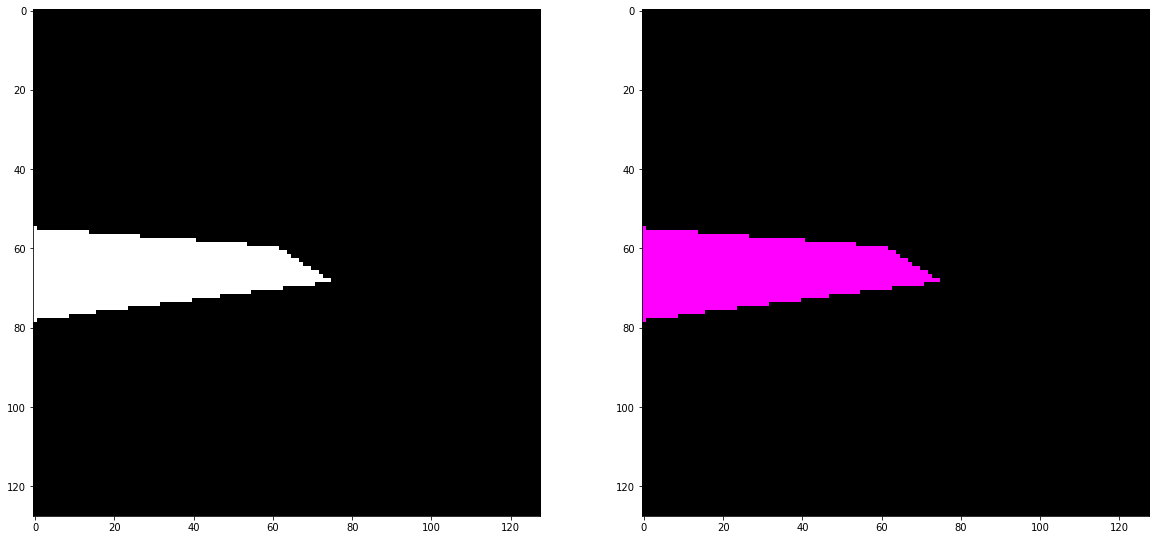

In [30]:
## Ramp

light_pink = (130, 70, 145)
dark_pink = (175, 255, 255)
mask = cv2.inRange(hsv_img, light_pink, dark_pink)
pink_result = cv2.bitwise_and(img, img, mask=mask)

plt.subplot(1, 2, 1)
plt.imshow(mask, cmap="gray")
plt.subplot(1, 2, 2)
plt.imshow(pink_result)
plt.show()

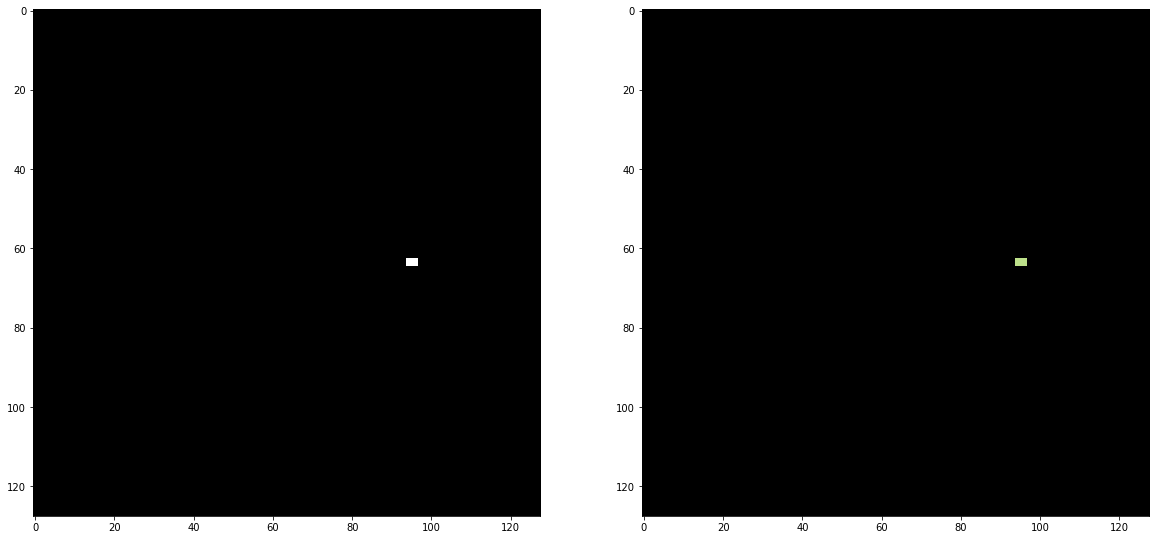

In [31]:
## Good goal

light_green = (35, 20, 160)
dark_green = (60, 115, 235)
goodgoal_mask = cv2.inRange(hsv_img, light_green, dark_green)
green_result = cv2.bitwise_and(img, img, mask=goodgoal_mask)

plt.subplot(1, 2, 1)
plt.imshow(goodgoal_mask, cmap="gray")
plt.subplot(1, 2, 2)
plt.imshow(green_result)
plt.show()

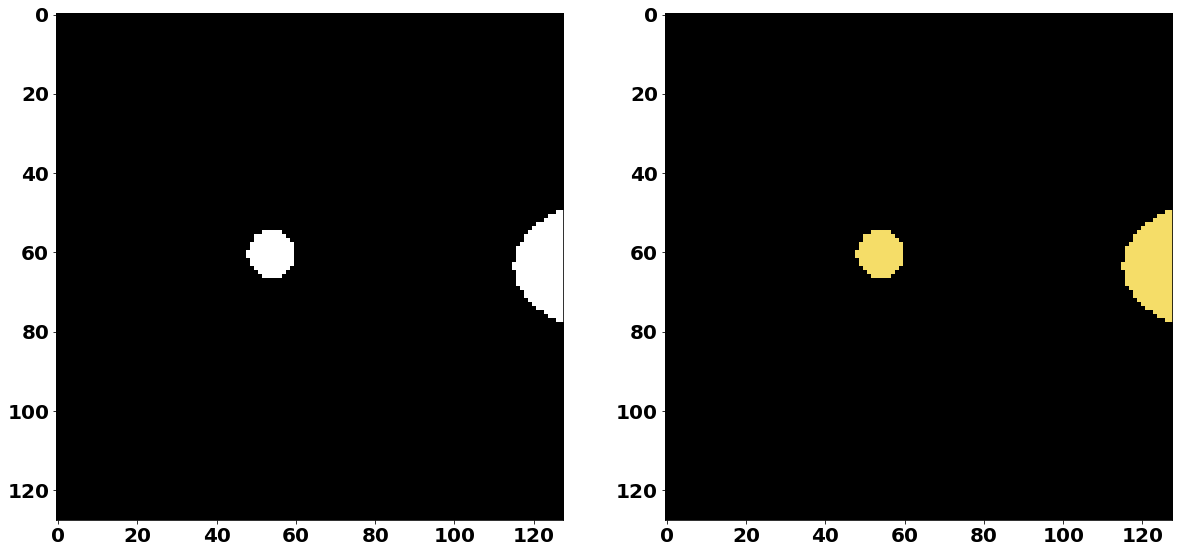

In [143]:
## Good goal multi

light_yellow = (23, 70, 180)
dark_yellow = (30, 150, 255)
yellow_mask = cv2.inRange(hsv_img, light_yellow, dark_yellow)
yellow_result = cv2.bitwise_and(img, img, mask=yellow_mask)

plt.subplot(1, 2, 1)
plt.imshow(yellow_mask, cmap="gray")
plt.subplot(1, 2, 2)
plt.imshow(yellow_result)
plt.show()

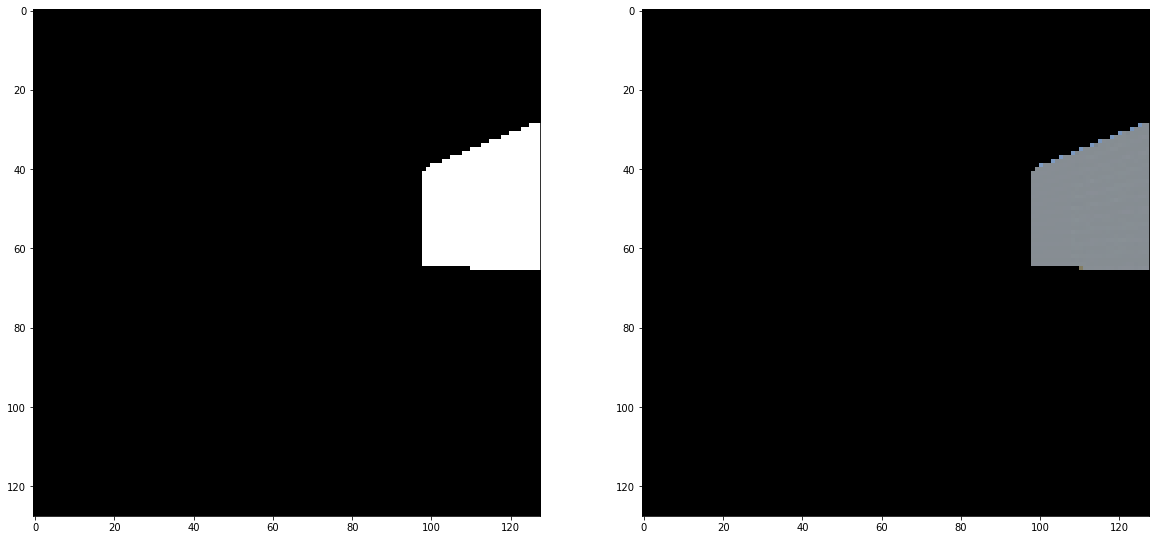

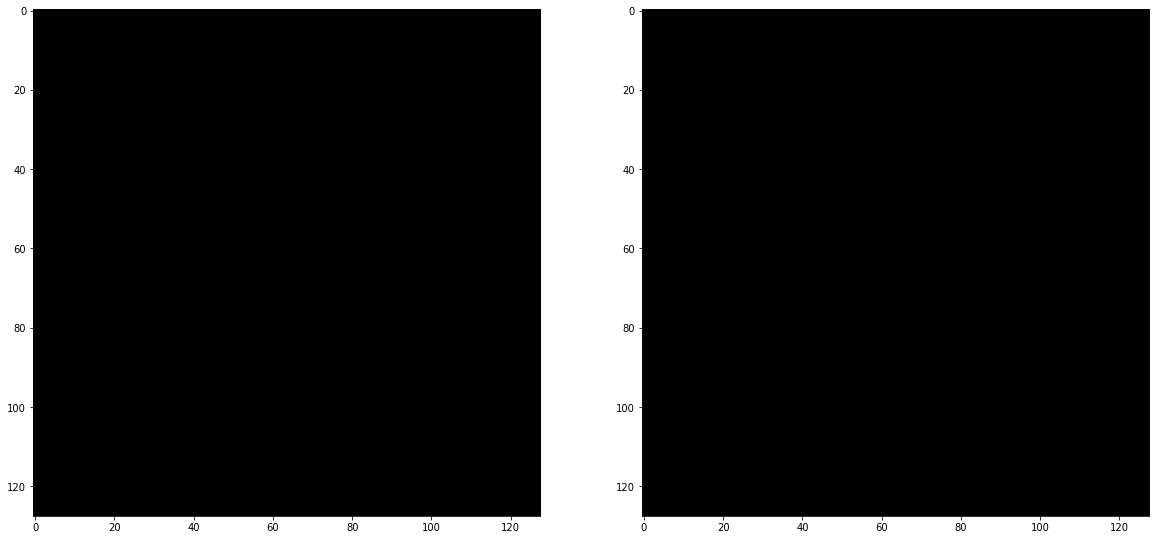

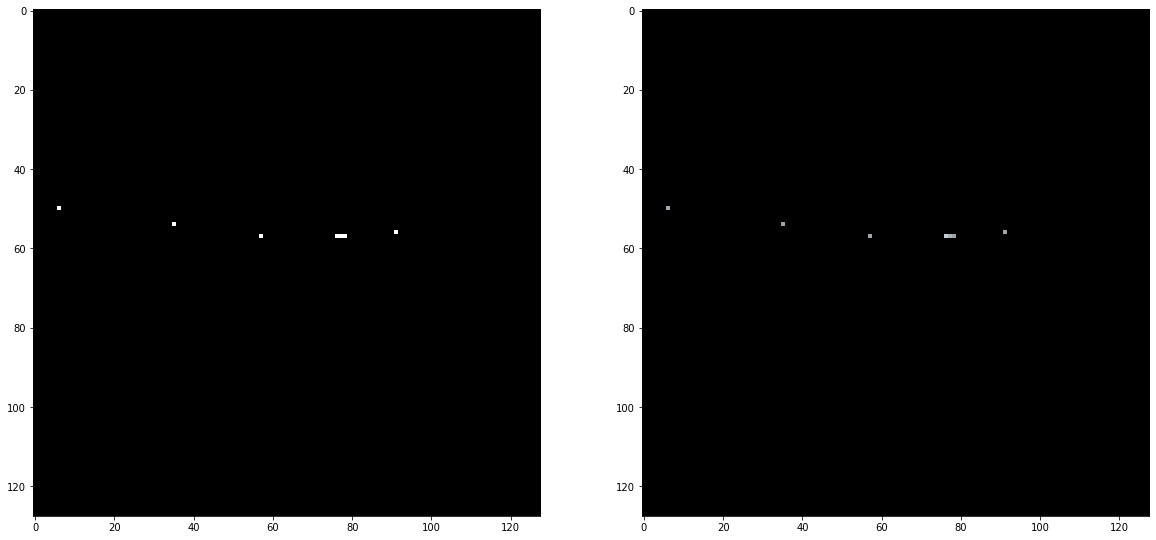

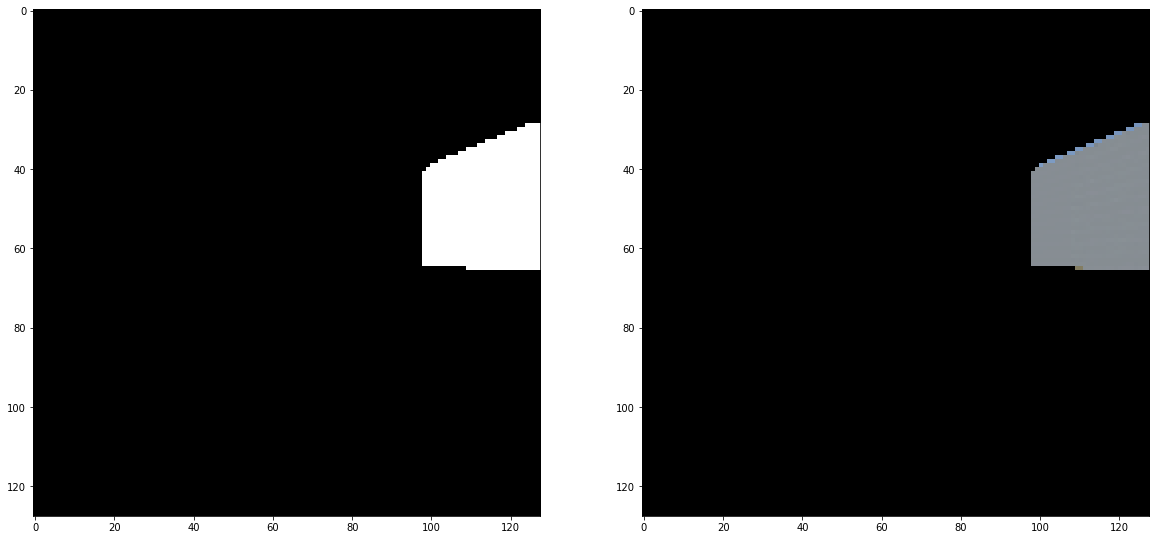

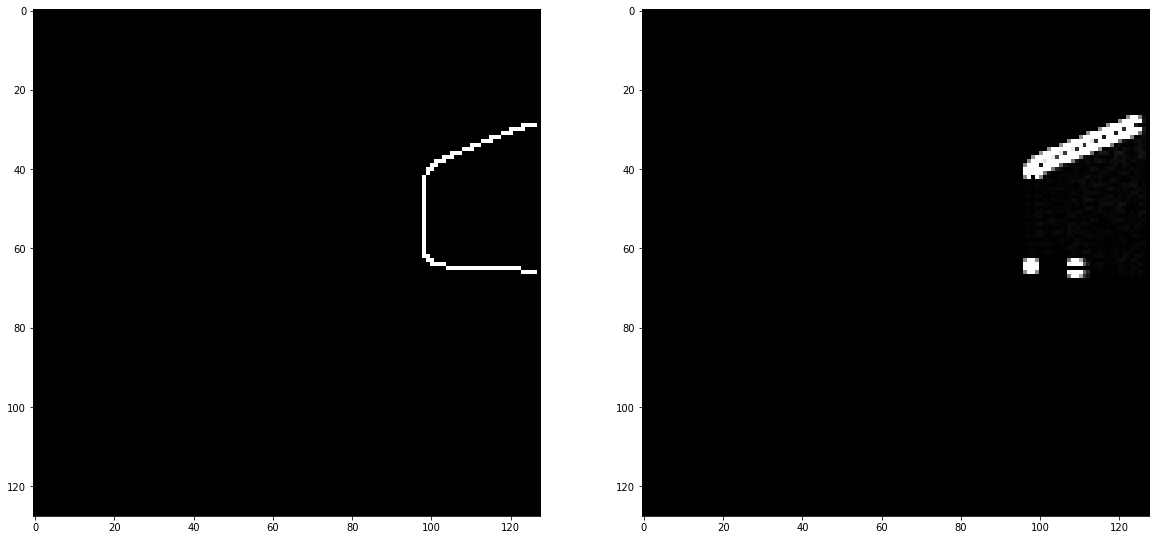

In [33]:
## Wall & Cylinder & Box very grays

light_gray = (85, 0, 0)
dark_gray = (115, 70, 164)
gray_mask1 = cv2.inRange(hsv_img, light_gray, dark_gray)
gray_mask1 = torch.tensor(np.array([gray_mask1])).float()
gray_mask1 = (np.array(F.avg_pool2d(gray_mask1 / 255, 3, stride=1, padding=1)[0]) > 0.4).astype(np.uint8) * 255

gray_result0 = cv2.bitwise_and(img, img, mask=gray_mask1)

plt.subplot(1, 2, 1)
plt.imshow(gray_mask1, cmap="gray")
plt.subplot(1, 2, 2)
plt.imshow(gray_result0)
plt.show()

## Wall & Cylinder more yellows

light_gray = (20, 0, 80)
dark_gray = (55, 40, 165)
gray_mask2 = cv2.inRange(hsv_img, light_gray, dark_gray)
gray_mask2 = torch.tensor(np.array([gray_mask2])).float()
gray_mask2 = (np.array(F.avg_pool2d(gray_mask2 / 255, 3, stride=1, padding=1)[0]) > 0.4).astype(np.uint8) * 255

result = cv2.bitwise_and(img, img, mask=gray_mask2)

plt.subplot(1, 2, 1)
plt.imshow(gray_mask2, cmap="gray")
plt.subplot(1, 2, 2)
plt.imshow(result)
plt.show()

## Wall & Cylinder & Box light grays

light_gray = (70, 0, 165)
dark_gray = (110, 24, 215)
gray_mask3 = cv2.inRange(hsv_img, light_gray, dark_gray)
# gray_mask3 = torch.tensor(np.array([gray_mask3])).float()
# gray_mask3 = (np.array(F.avg_pool2d(gray_mask3 / 255, 3, stride=1, padding=1)[0]) > 0.4).astype(np.uint8) * 255

result = cv2.bitwise_and(img, img, mask=gray_mask3)

plt.subplot(1, 2, 1)
plt.imshow(gray_mask3, cmap="gray")
plt.subplot(1, 2, 2)
plt.imshow(result)
plt.show()

## Wall & Cylinder & Box combined + denoising

gray_mask = gray_mask1 + gray_mask2 + gray_mask3
 
# Avg pooling for denoising
gray_mask = torch.tensor(np.array([gray_mask])).float()
gray_mask = (np.array(F.avg_pool2d(gray_mask / 255, 3, stride=1, padding=1)[0]) > 0.4).astype(np.uint8) * 255

result = cv2.bitwise_and(img, img, mask=gray_mask)

plt.subplot(1, 2, 1)
plt.imshow(gray_mask, cmap="gray")
plt.subplot(1, 2, 2)
plt.imshow(result)
plt.show()

# Canny and Sobel edge detection (poor results)
gray_result = cv2.cvtColor(result, cv2.COLOR_RGB2GRAY)
masked_canny = feature.canny(gray_result, sigma=3)
full_canny = feature.canny(cv2.cvtColor(img, cv2.COLOR_RGB2GRAY), sigma=3)

masked_sobelxy = cv2.Sobel(src=gray_result, ddepth=cv2.CV_16S, dx=1, dy=1, ksize=5)

plt.subplot(1, 2, 1)
plt.imshow(masked_canny, cmap="gray")
plt.subplot(1, 2, 2)
plt.imshow(cv2.convertScaleAbs(masked_sobelxy), cmap="gray")
# plt.subplot(1, 2, 2)
# plt.imshow(full_canny, cmap="gray")
plt.show()

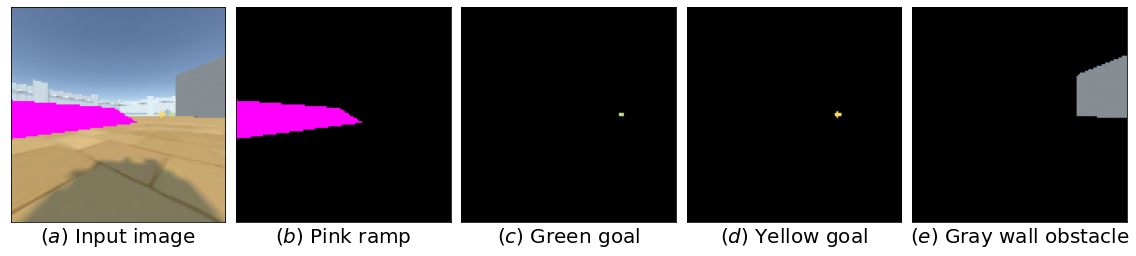

In [60]:
# Mask plotter

font = {'family' : 'normal',
        'size'   : 20}

plt.rc('font', **font)
plt.subplot(1, 5, 1)
plt.imshow(img)
plt.xlabel("($\it{a}$) Input image")
plt.xticks([])
plt.yticks([])
plt.subplot(1, 5, 2)
plt.imshow(pink_result)
plt.xlabel("($\it{b}$) Pink ramp")
plt.xticks([])
plt.yticks([])
plt.subplot(1, 5, 3)
plt.imshow(green_result)
plt.xlabel("($\it{c}$) Green goal")
plt.xticks([])
plt.yticks([])
plt.subplot(1, 5, 4)
plt.imshow(yellow_result)
plt.xlabel("($\it{d}$) Yellow goal")
plt.xticks([])
plt.yticks([])
plt.subplot(1, 5, 5)
plt.imshow(gray_result0)
plt.xlabel("($\it{e}$) Gray wall obstacle")
plt.xticks([])
plt.yticks([])
plt.subplots_adjust(wspace=0.05, hspace=0.05)
plt.show()

(128, 128)
-> Plotted Images at: my_figure4.png


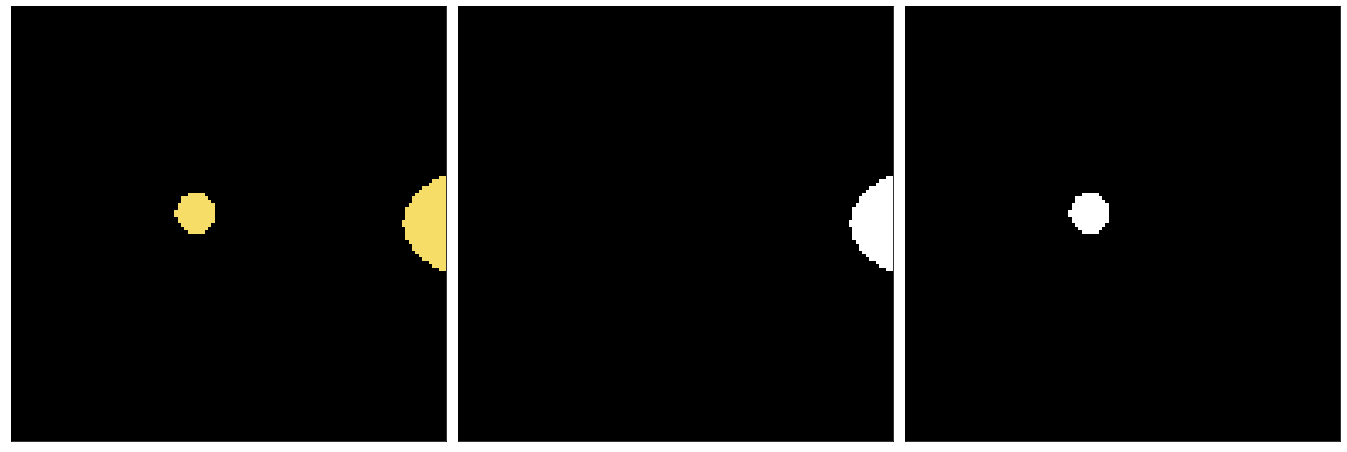

In [151]:
import math

BATCH_SIZE = 1

def plot_images(images, columns, size):
    file_name = 'my_figure4.png'
    print(f"-> Plotted Images at: {file_name}")
    if len(images) > 0:
        rows = math.ceil(len(images) / columns)
        f, ax = plt.subplots(rows, columns, figsize=(size * columns, size * rows))
        for i, axis in enumerate(ax.ravel()):
            # axis.axis('off')
            if i < (BATCH_SIZE * (len(images) - 0)):
                if i == 0:
                    axis.imshow(images[i // BATCH_SIZE])
                else:
                    axis.imshow(images[i // BATCH_SIZE], cmap="gray")
                axis.set_xticks([])
                axis.set_yticks([])
        plt.subplots_adjust(wspace=0.005, hspace=0.05)

        plt.show


# Create seperate segmentation masks per object instance, using flood fill

floodflags = 8
floodflags |= (255 << 8)

inp = np.copy(yellow_mask)
M, N = inp.shape

object_masks = []

for i in range(M):
    for j in range(N):
        if inp[i, j] == 255:
            mask = np.zeros((M + 2, N + 2), dtype=np.uint8)
            cv2.floodFill(image=inp, newVal=0, mask=mask, seedPoint=(j, i), flags=floodflags)
            mask = mask[1:-1, 1:-1]

            # Maybe just for gray obstacles
            if np.count_nonzero(mask) > 15:
                object_masks.append(mask)
            
plot_images([yellow_result] + object_masks, 3, 8)